In [2]:
%matplotlib inline
from preamble import *

# Linear Models
One of the simplest models is a linear, that simply tries to predict the data as lying on a line. One way to find such a line is LinearRegression (also known as Ordinary Least Squares (OLS) regression). The interface for LinearRegression is exactly the same as for the classifiers before, only that y now contains float values, instead of classes.

##### Linear models for regression

All linear models for regression learn a coefficient parameter **w** and an offset **b** to make predictions using a linear combination of features:

<img src="images/Linear-regression-formula.PNG" width="50%">


The difference between the linear models for regression is what kind of restrictions or penalties are put on ``coef_`` as regularization , in addition to fitting the training data well.

The most standard linear model is the 'ordinary least squares regression', often simply called 'linear regression'. It doesn't put any additional restrictions on ``coef_``, so when the number of features is large, it becomes ill-posed and the model overfits.

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

\begin{align*}
\end{align*}

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2 $$

w[0]: 0.393906  b: -0.031804


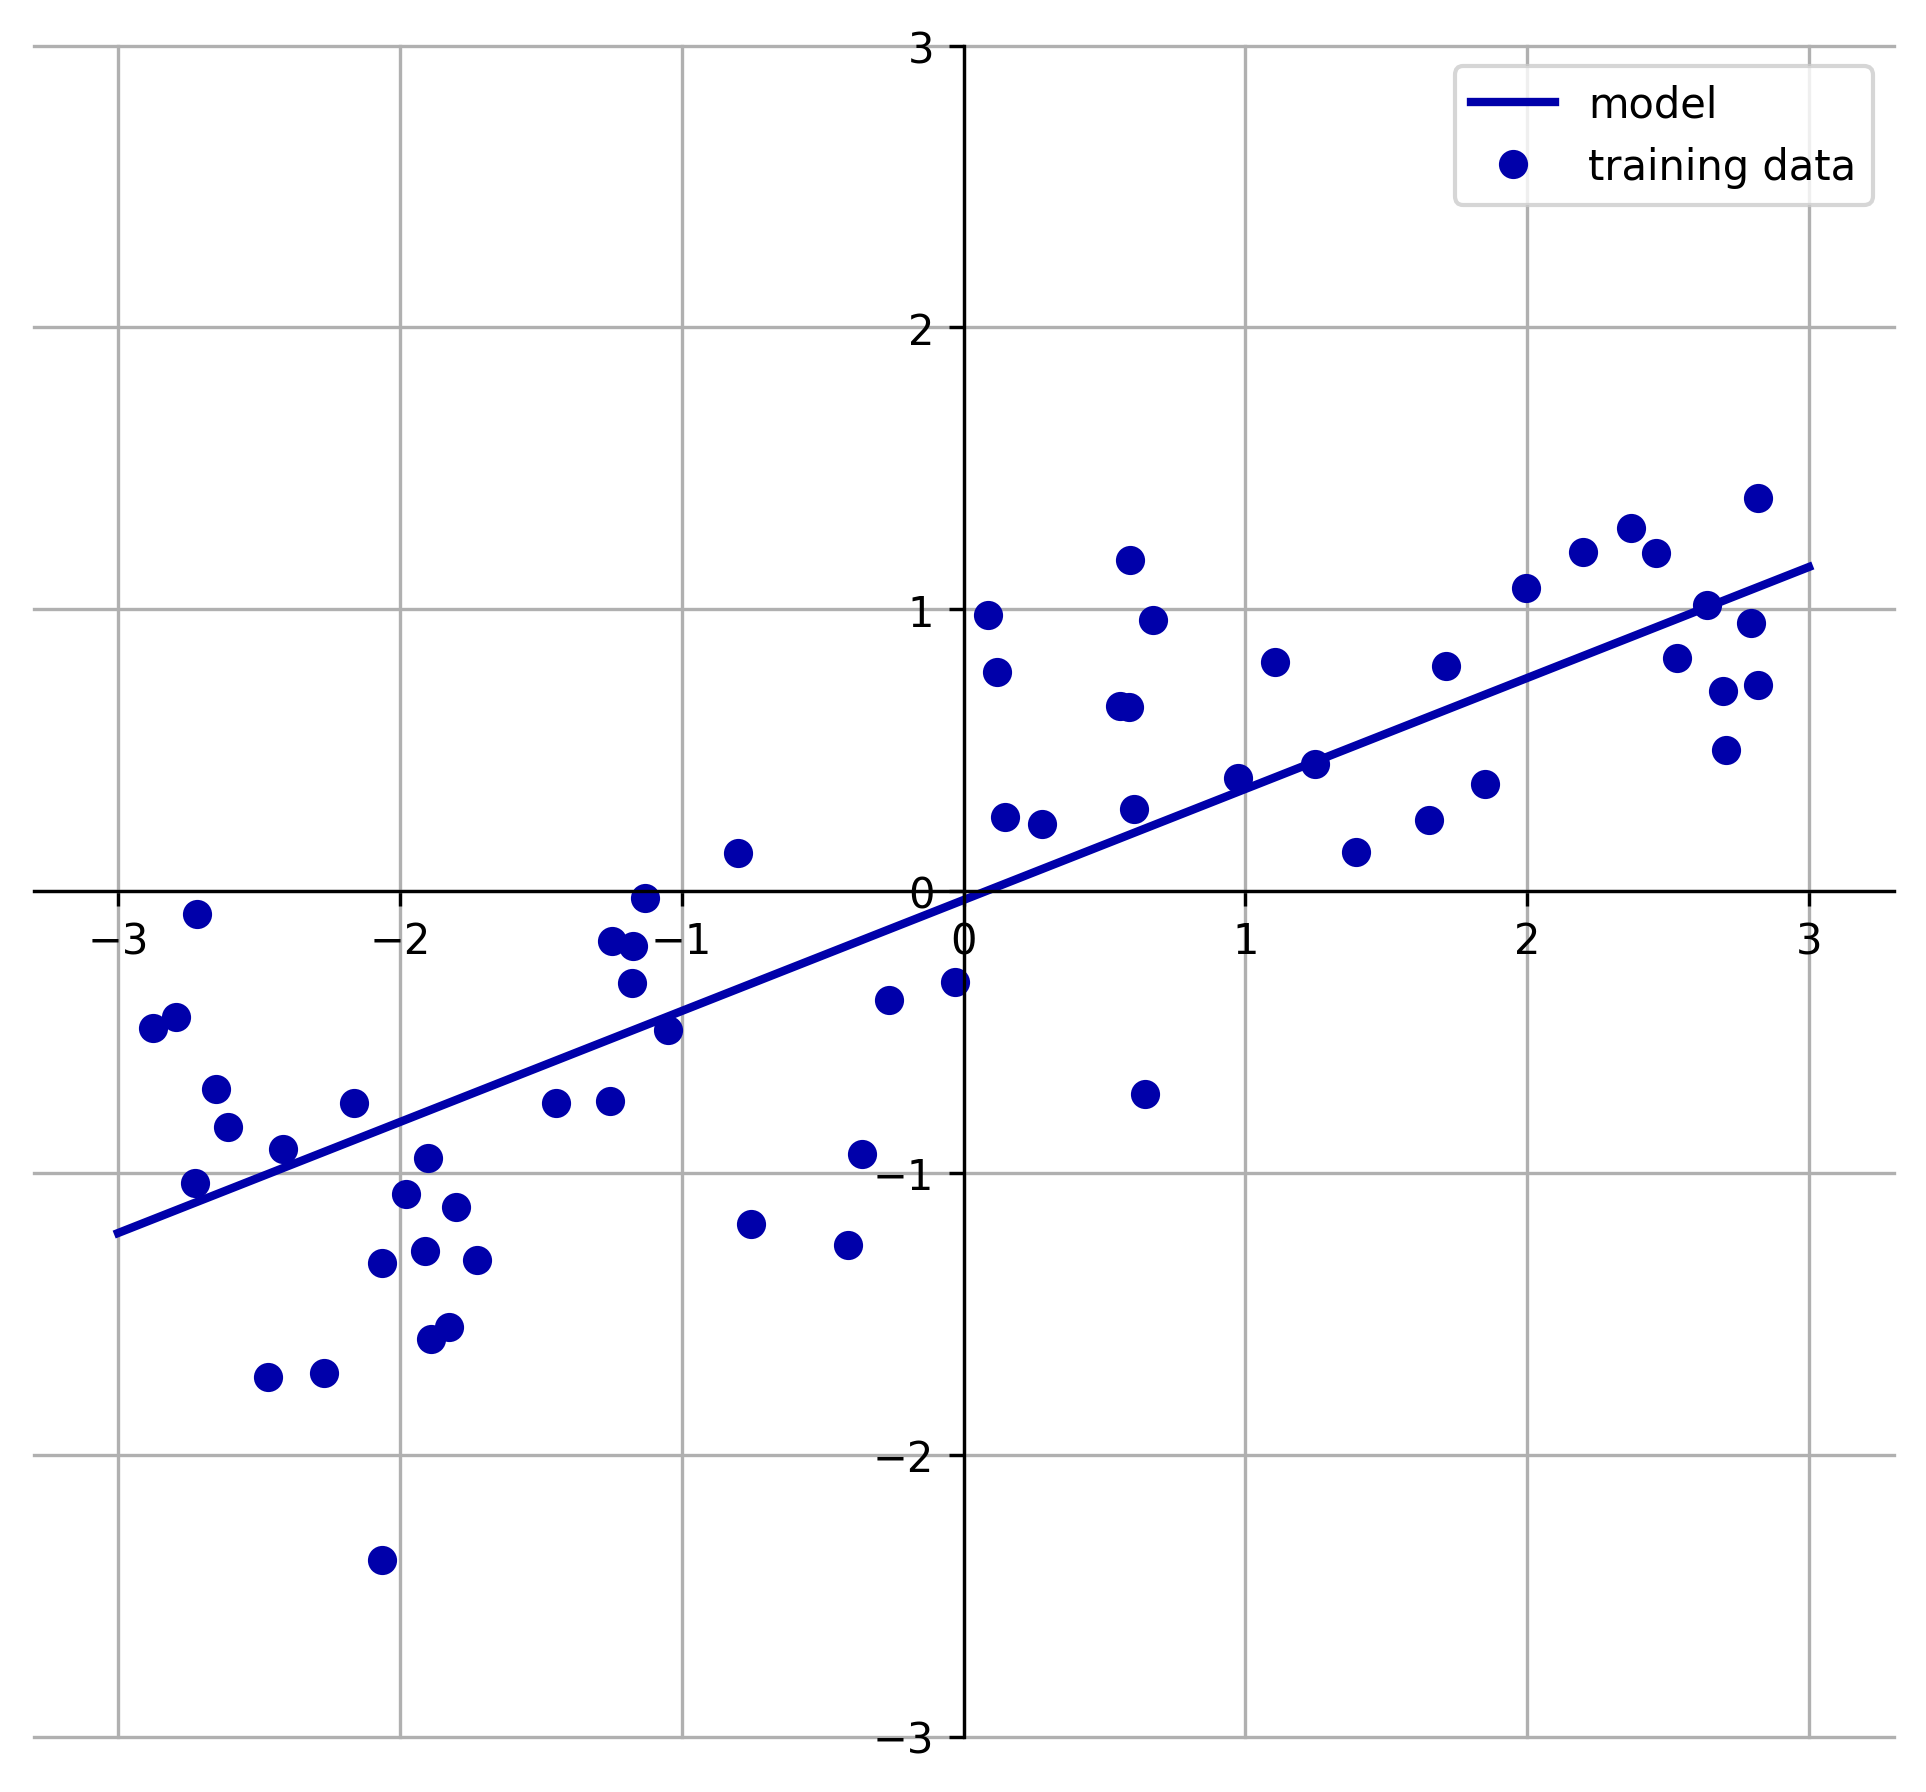

In [3]:
mglearn.plots.plot_linear_regression_wave()

#### Linear Regression aka Ordinary Least Squares

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.394]
lr.intercept_: -0.0318043430268


In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


Scores are not very good for both train and test, therefore it means underfitting.

Lets take a look at a more complex dataset 'Boston Housing dataset'

In [7]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [8]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This means overfitting.

Therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is **ridge regression**

### Ridge regression

Ridge regression uses the same formula to make predictions.

In ridge regression,though, the coefficients (w) are chosen not only so that they predict well on the training data, but we also want the magnitude of coefficients (w) to be as small as possible; in other words, all entries of w should be close to zero. 

Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called **regularization**.

Regularization means explicitly restricting a model to avoid overfitting

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Ridge is a more restricted model, so we are less likely to overfit.

A less complex model means worse performance on the training set, but better generalization.

As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model.

Ridge regression has a regularization parameter called **alpha**. 

Default is 1.0.

Increasing alpha forces coefficient to move more toward zero, which decreases training set performance.

In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


So, alpha = 0.1 seems to be a better choice.

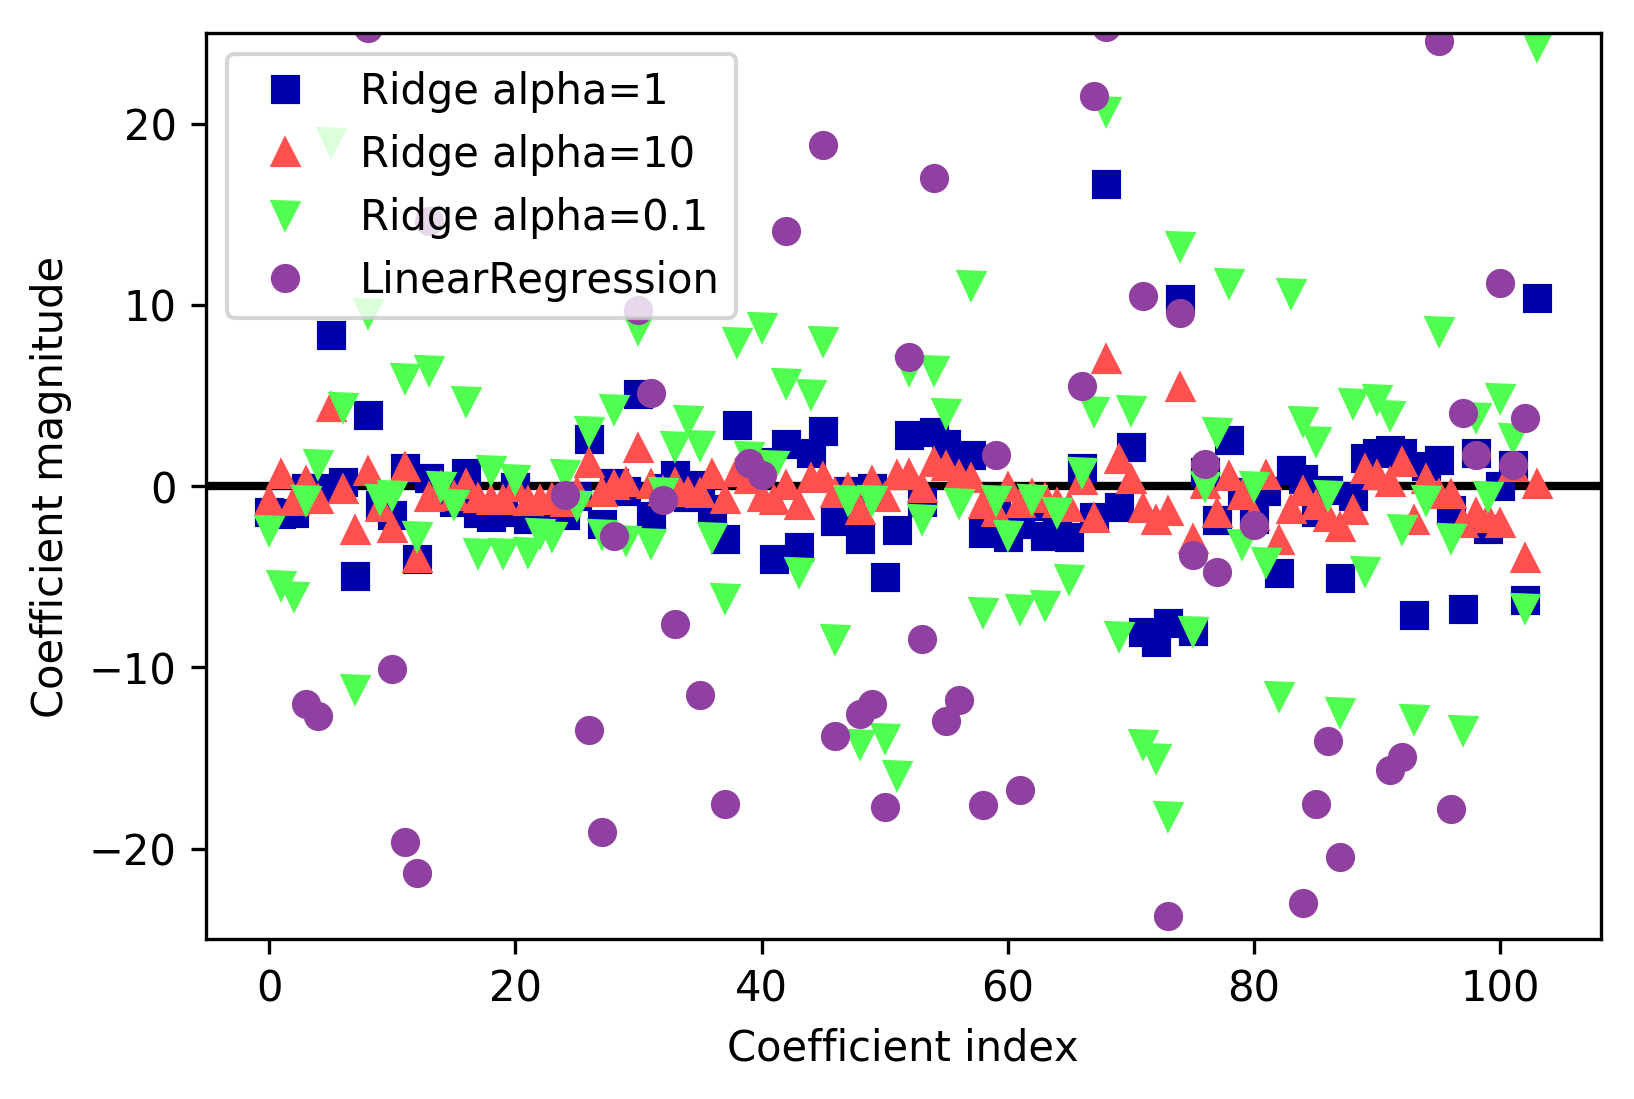

In [12]:
#plt.figure(figsize=(10, 5))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

Lets fix the value of alpha, but vary the amount of training data available. 

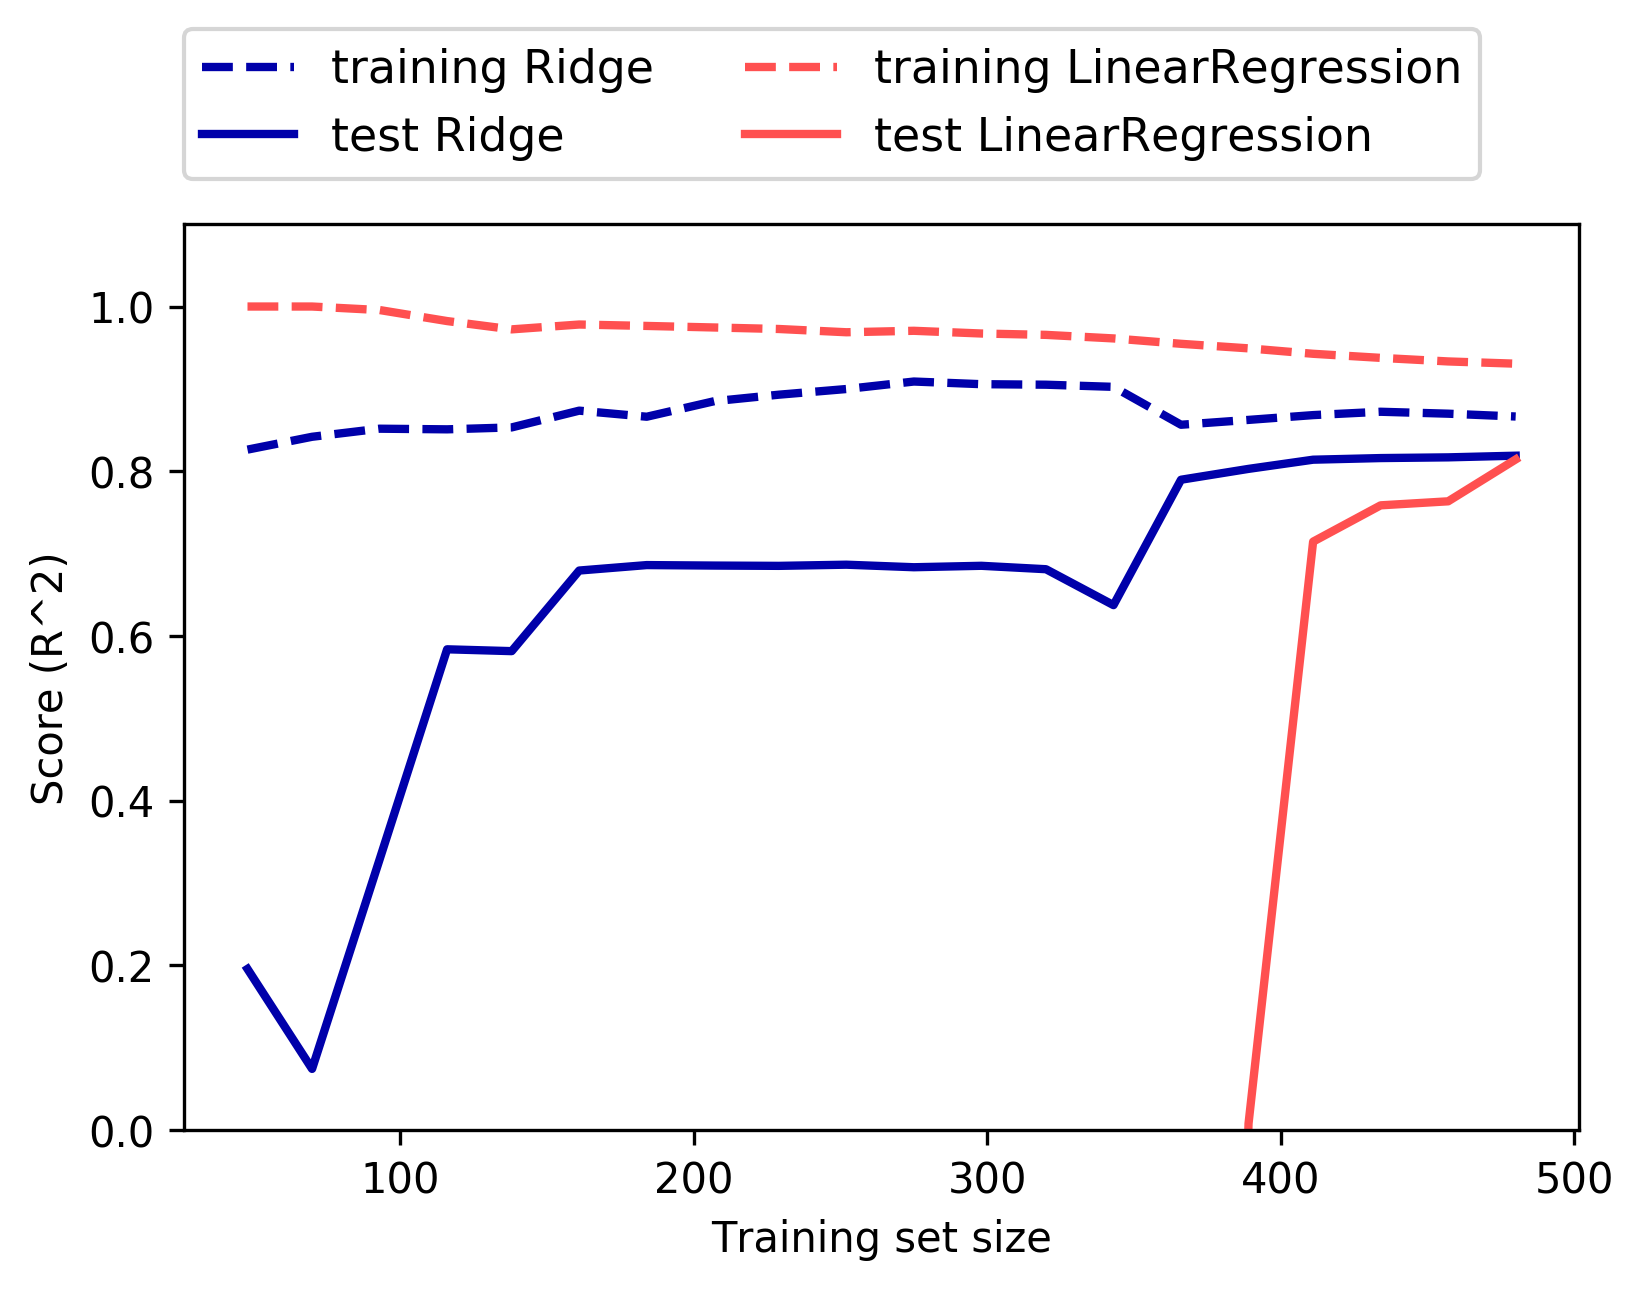

In [13]:
mglearn.plots.plot_ridge_n_samples()

For small subset of data, regularization helps to get better test accuracy, however, for large data, regularization become less important.

### Lasso

- alternative to Ridge
- performs L1 regularization
- some coefficients are exactly zero (some features are entirely ignored by the model)
- fewer features (most important features of the model)

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


- underfitting
- using only 4 out of 105 features
- also has regularization parameter alpha

In [15]:
# lets decrease alpha,but, we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


- A lower alpha fits a more complex model, which worked better on training and tesing.

if alpha too small -> removes effect of regularization and hence overfitting, similar to Linear Regression.

In [16]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


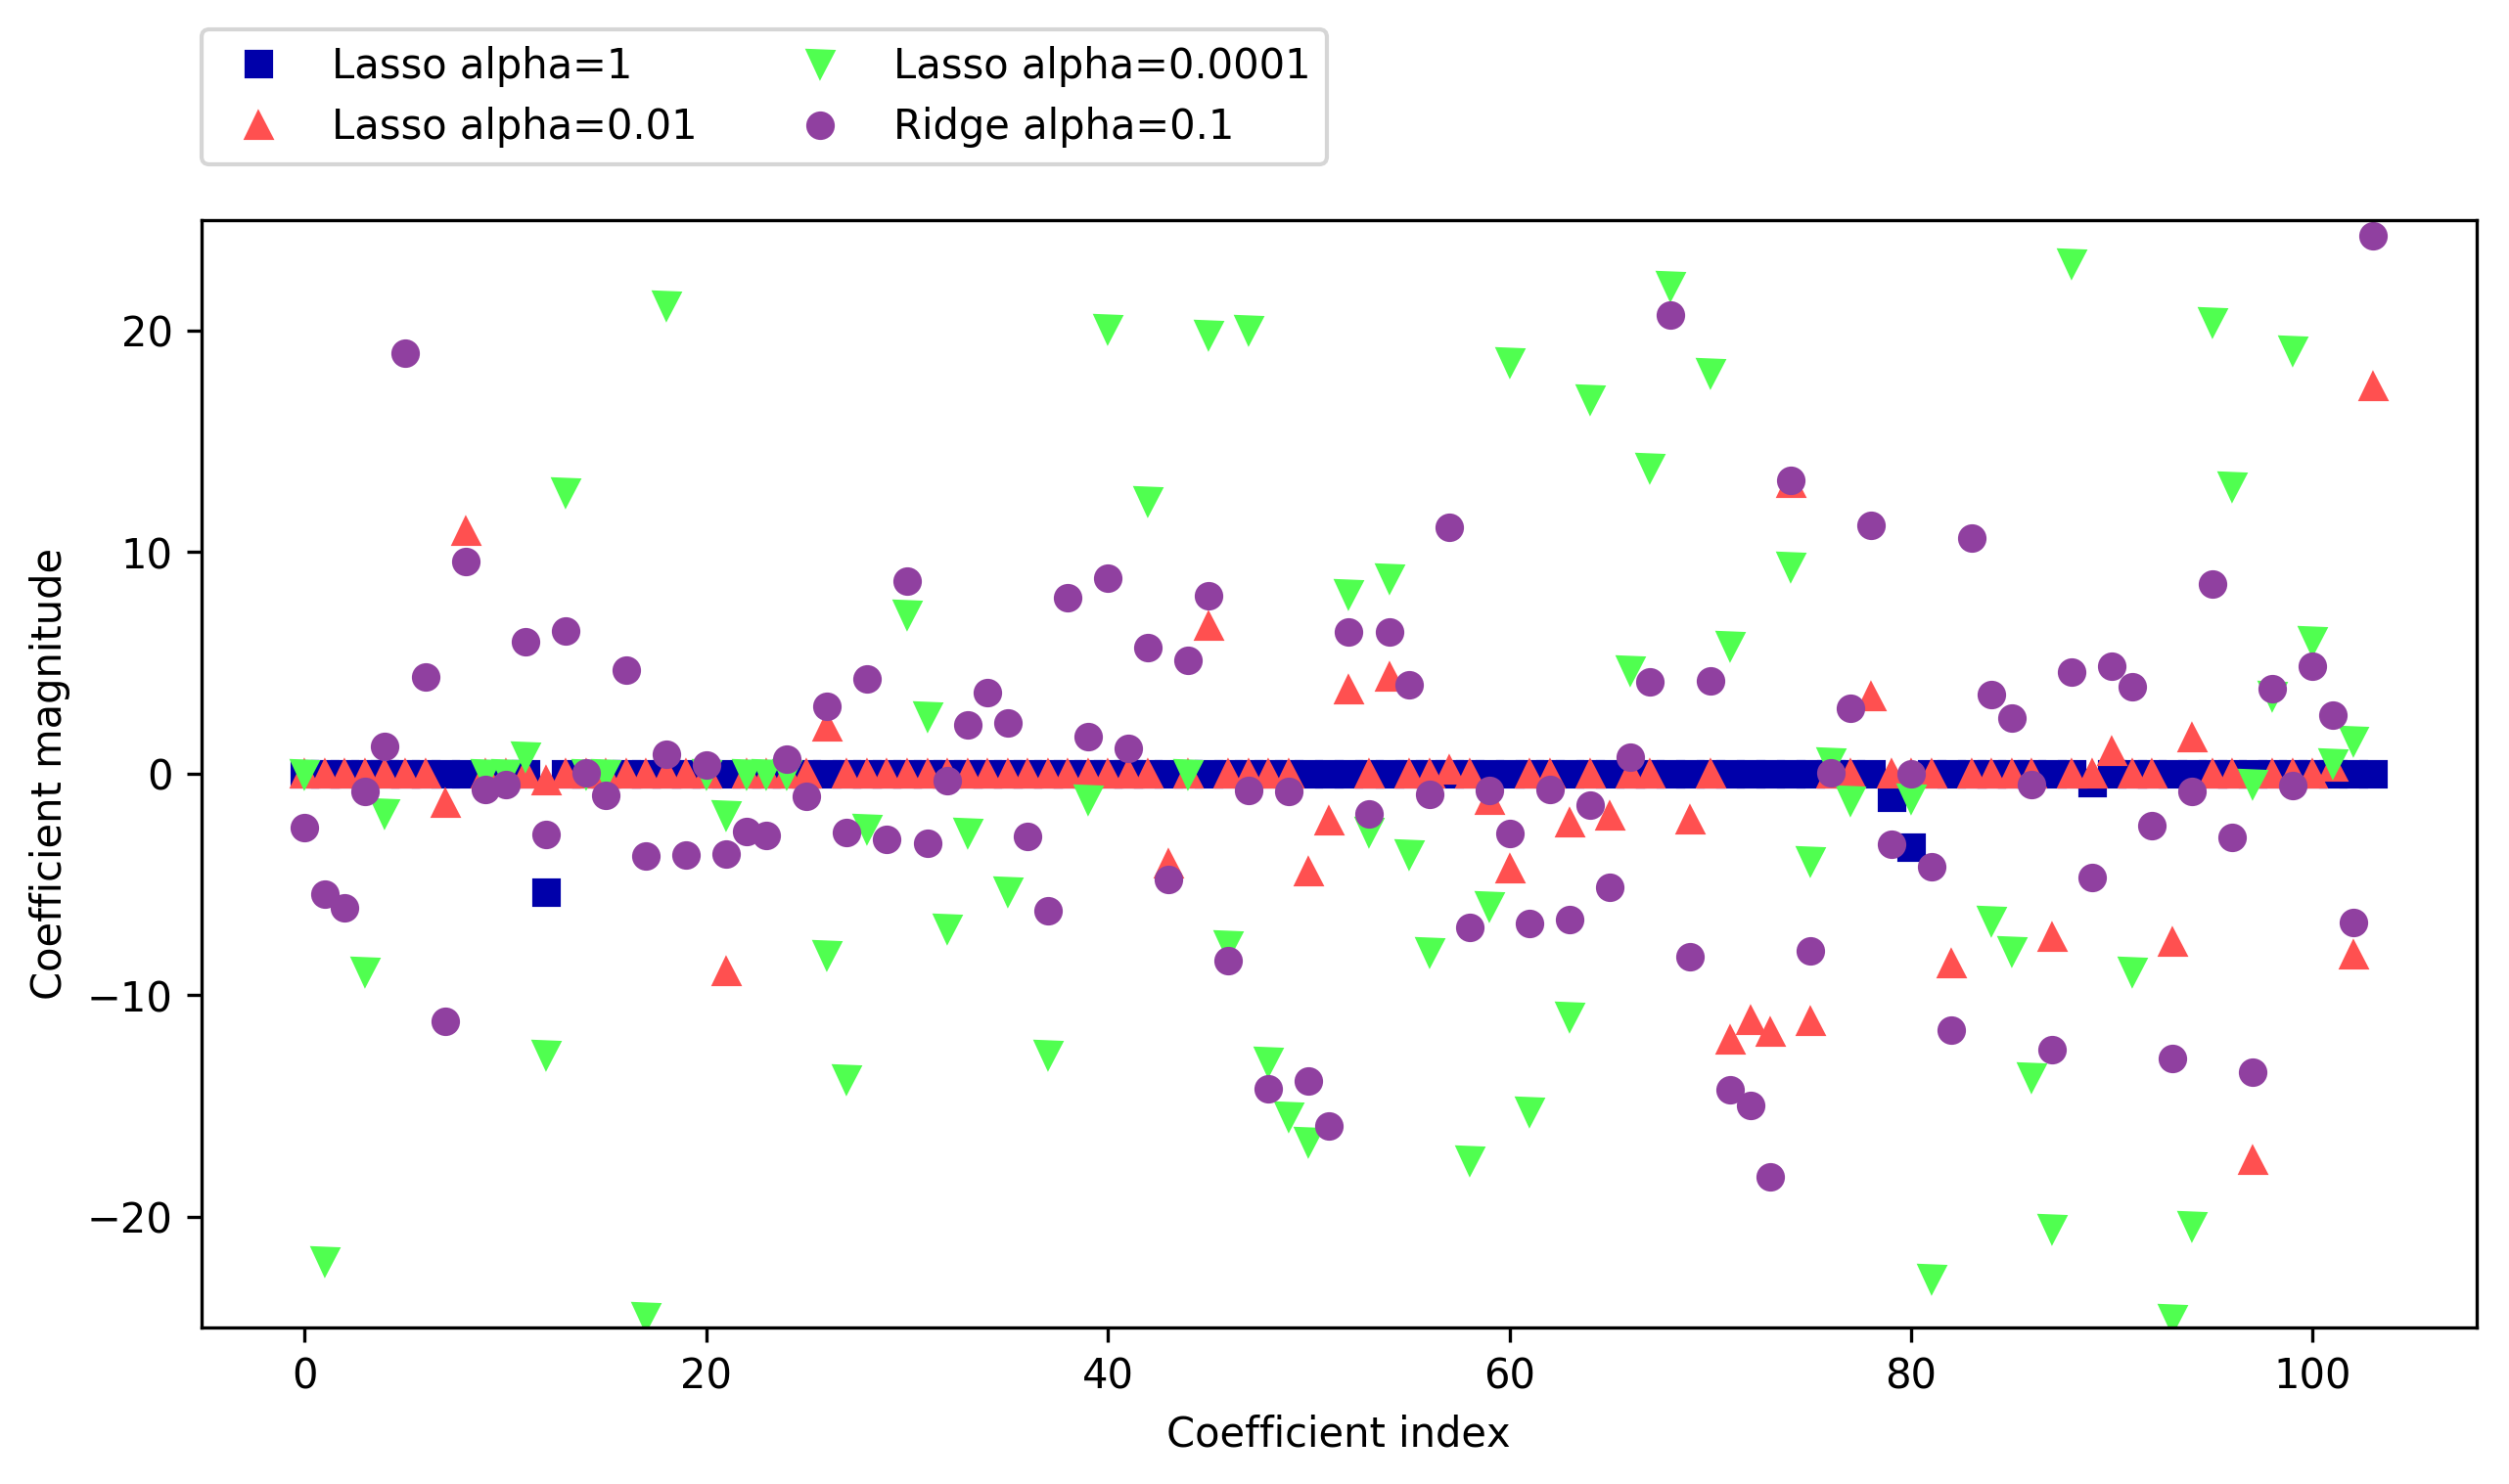

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

- In practice, ridge regression is usually the first choice between these two models. \
- However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice.
- scikit-learn has 'ElasticNet', which combines the penalties of Lasso and Ridge. In practice works best, but we have to adjust two parameters, one for L1 regularization and one for L2 regularization.

## Linear models for Classification

#### What are the odds that an event will happen? Answering yes/no questions.

Often we have to resolve questions with binary or yes/no outcomes.

For example:

* _Does a patient have cancer?_

* _Will a team win the next game?_

* _Will the customer buy my product?_

* _Will I get the loan?_

#### A familiar example

We are going to start by plotting something we understand in the real world, although we may never actually have plotted it before. Let's say on the x-axis is the number of goals scored by an NFL team over a season and say the outcome on the y-axis is whether they lost or won the game indicated by a value of 0 or 1 respectively.  

Then a plot for these scores might look like this:

<img src="files/images/b1fig1_nfloutcomes.png" />

#### How do we model this sort of data best?
<img src="files/images/standardSigmoidFunction.png" />

### Now for a spot of Math

A function that has the above shape is:

$$P(x) = \frac{1}{1 + e^{b_0 + b_1x}}$$

where P(x) is the probability of a score of x leading to a win.  
$b_0, b_1$ are parameters that we will estimate, so the curve fits our data.


Notice that we have a familiar looking linear function,  
$$b_0 + b_1x$$  
but it's plugged into a formula that generates the shape we want.  

So how does this formula predict Yes/No outcomes and why this function of all functions?  


The two most common linear classification algorithms are **logistic regression** and **linear support vector machines
(linear SVMs)**.

Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.

\begin{align*}
\end{align*}

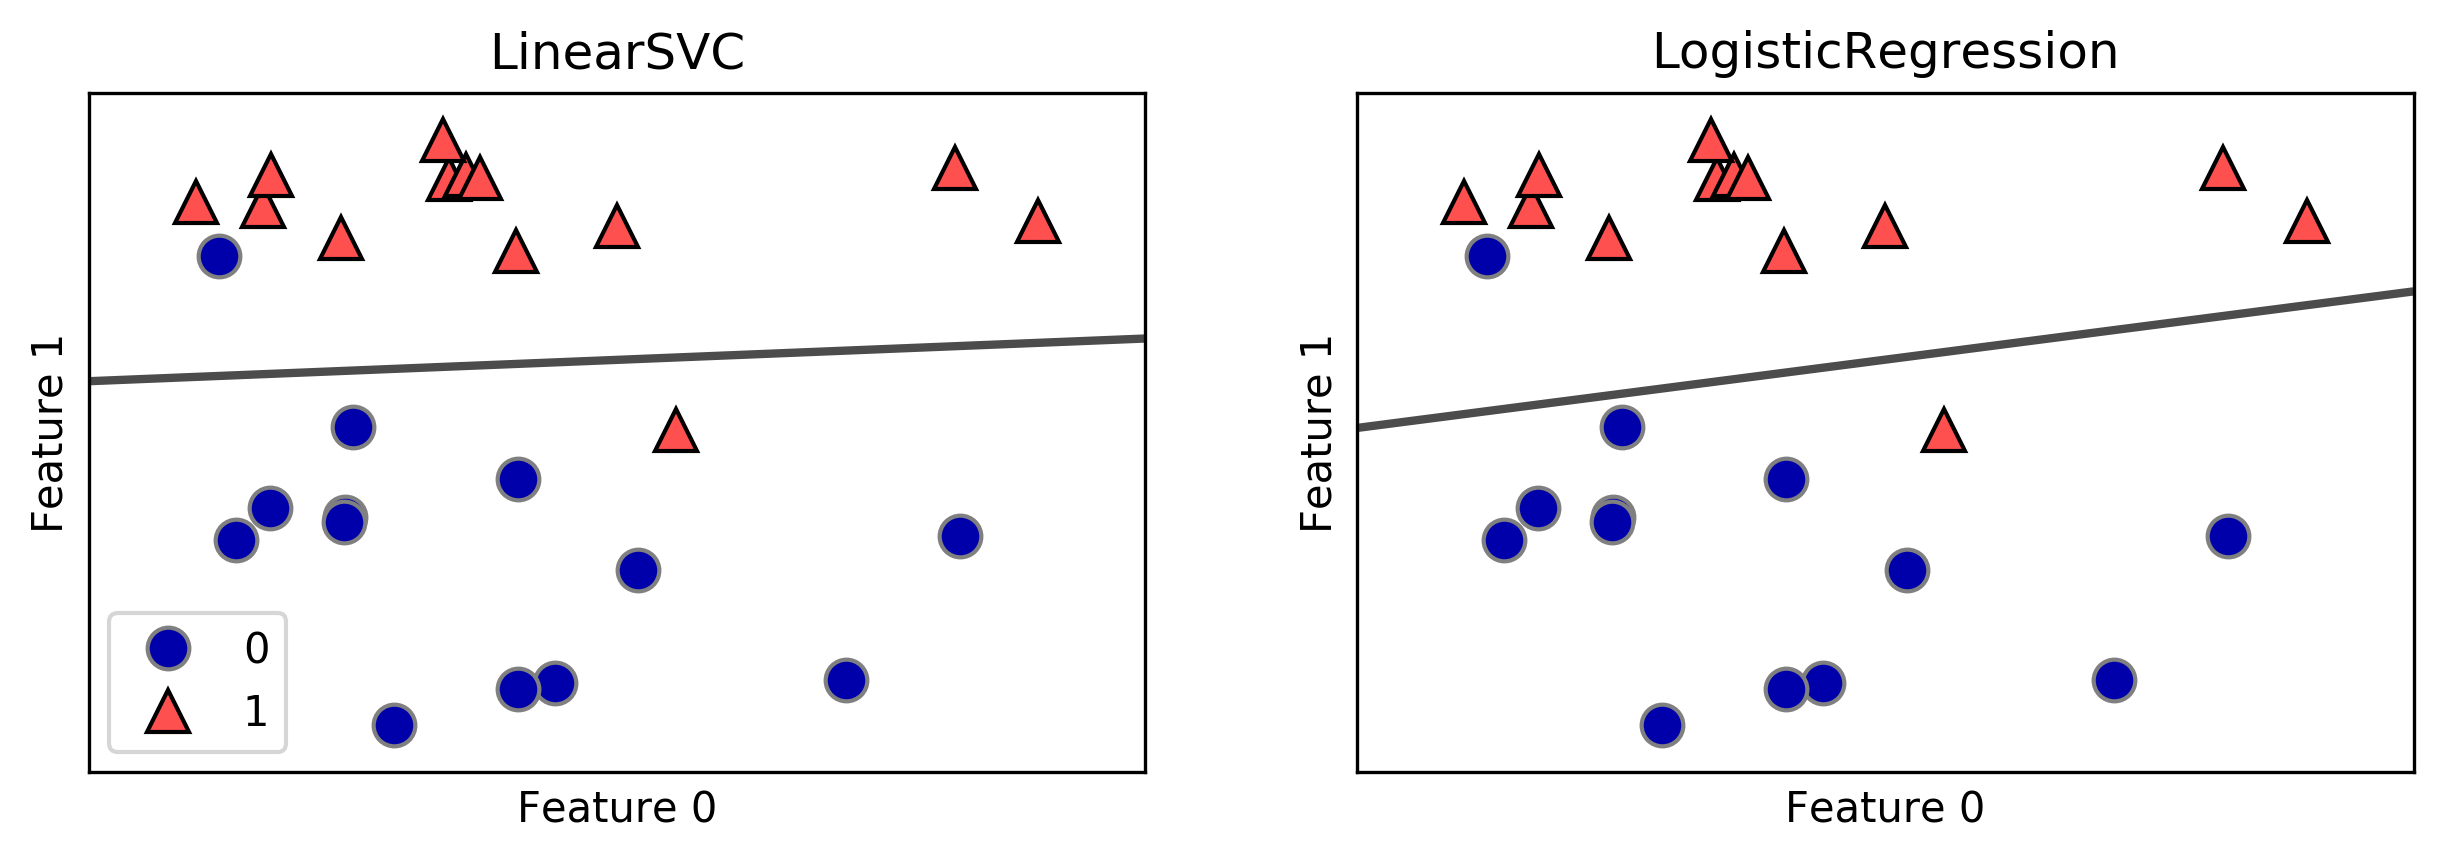

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

Both come up with similar decision boundaries. By default, both models apply an L2 regularization, in the same way that Ridge does for linear regression.

There is a regularization parameter C, higher value of C corresponds to less regularization. In other words, higher values of C means best possible fit on training set.

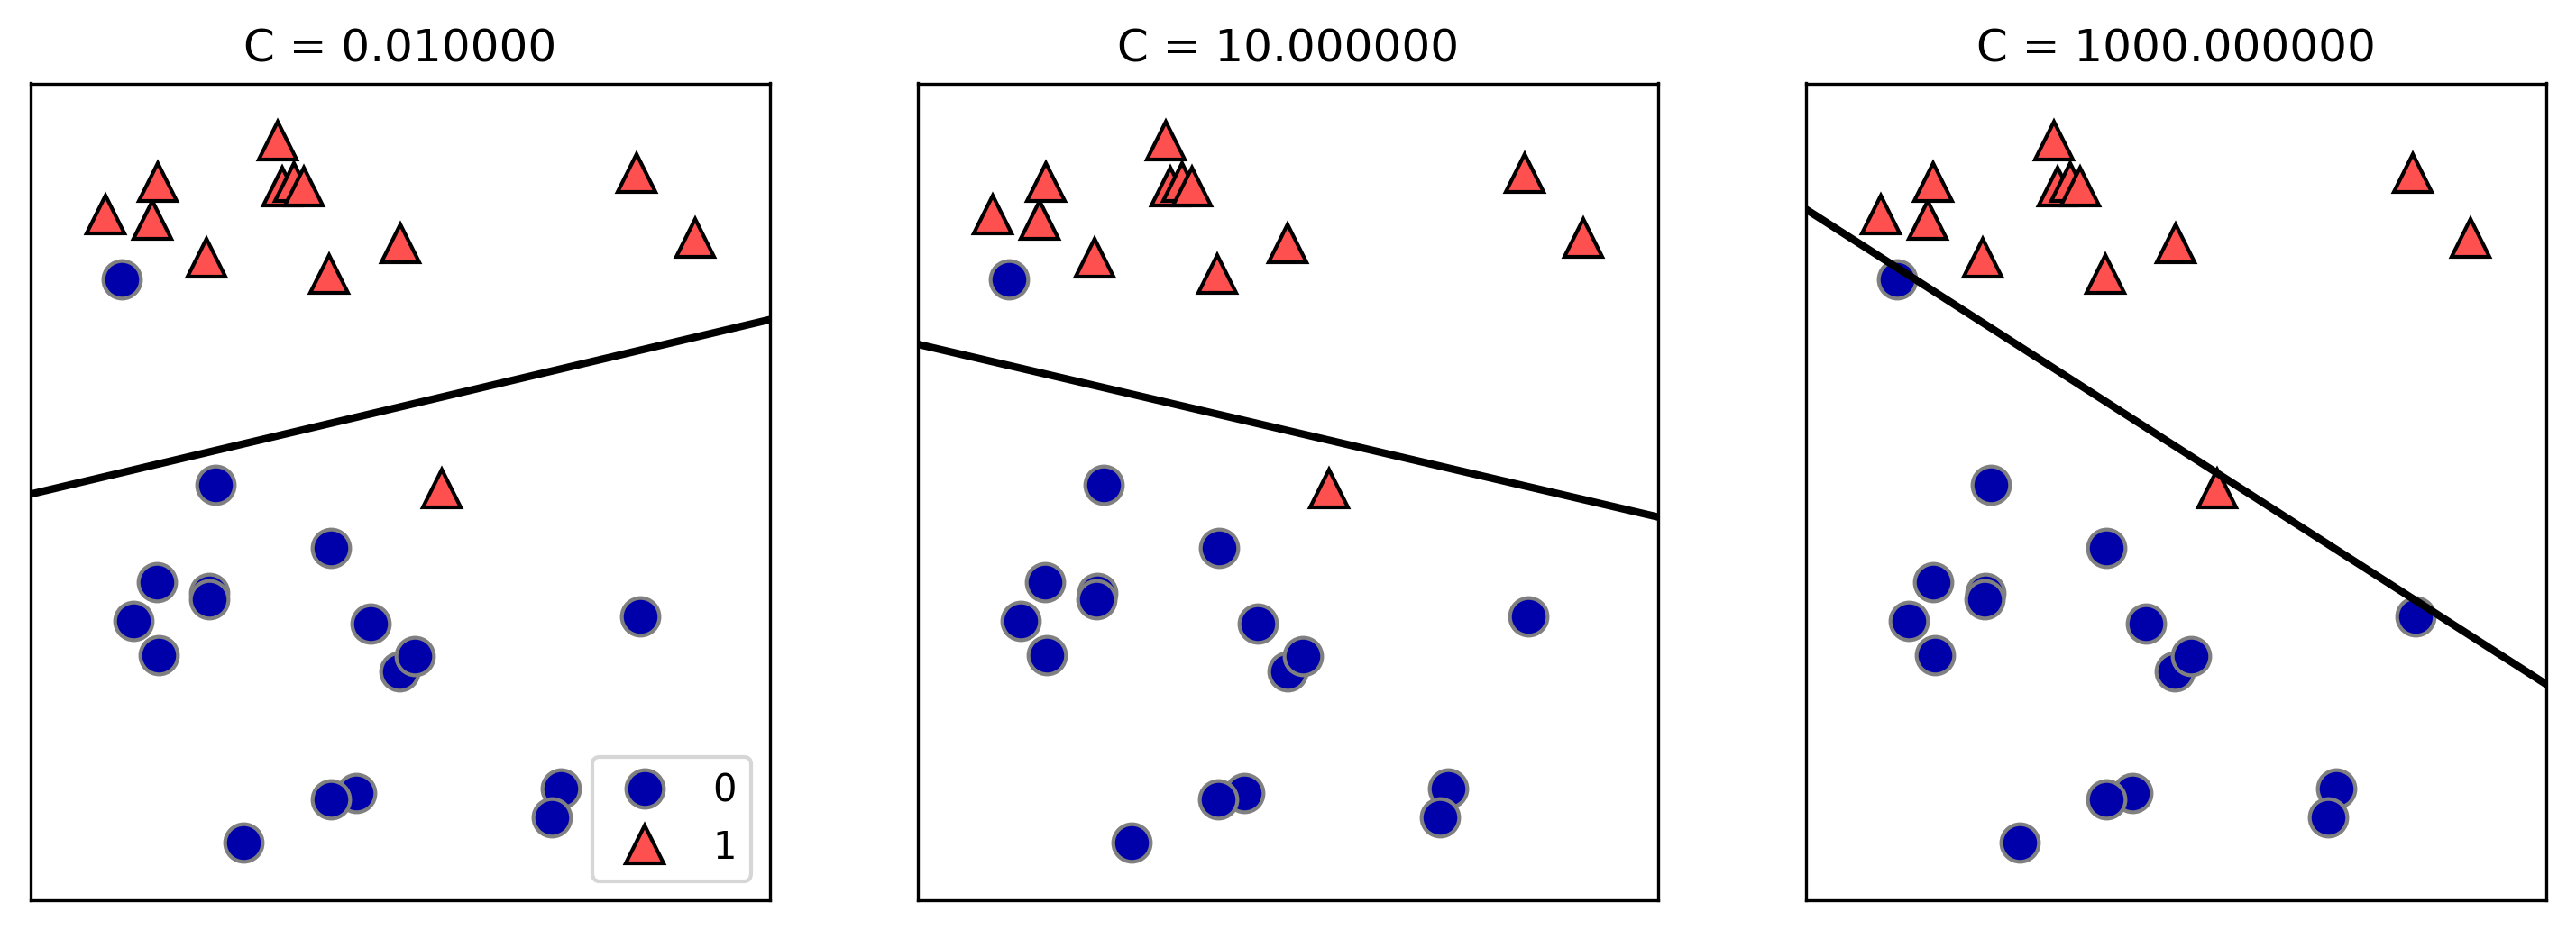

In [19]:
mglearn.plots.plot_linear_svc_regularization()

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [21]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [22]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


model underfits

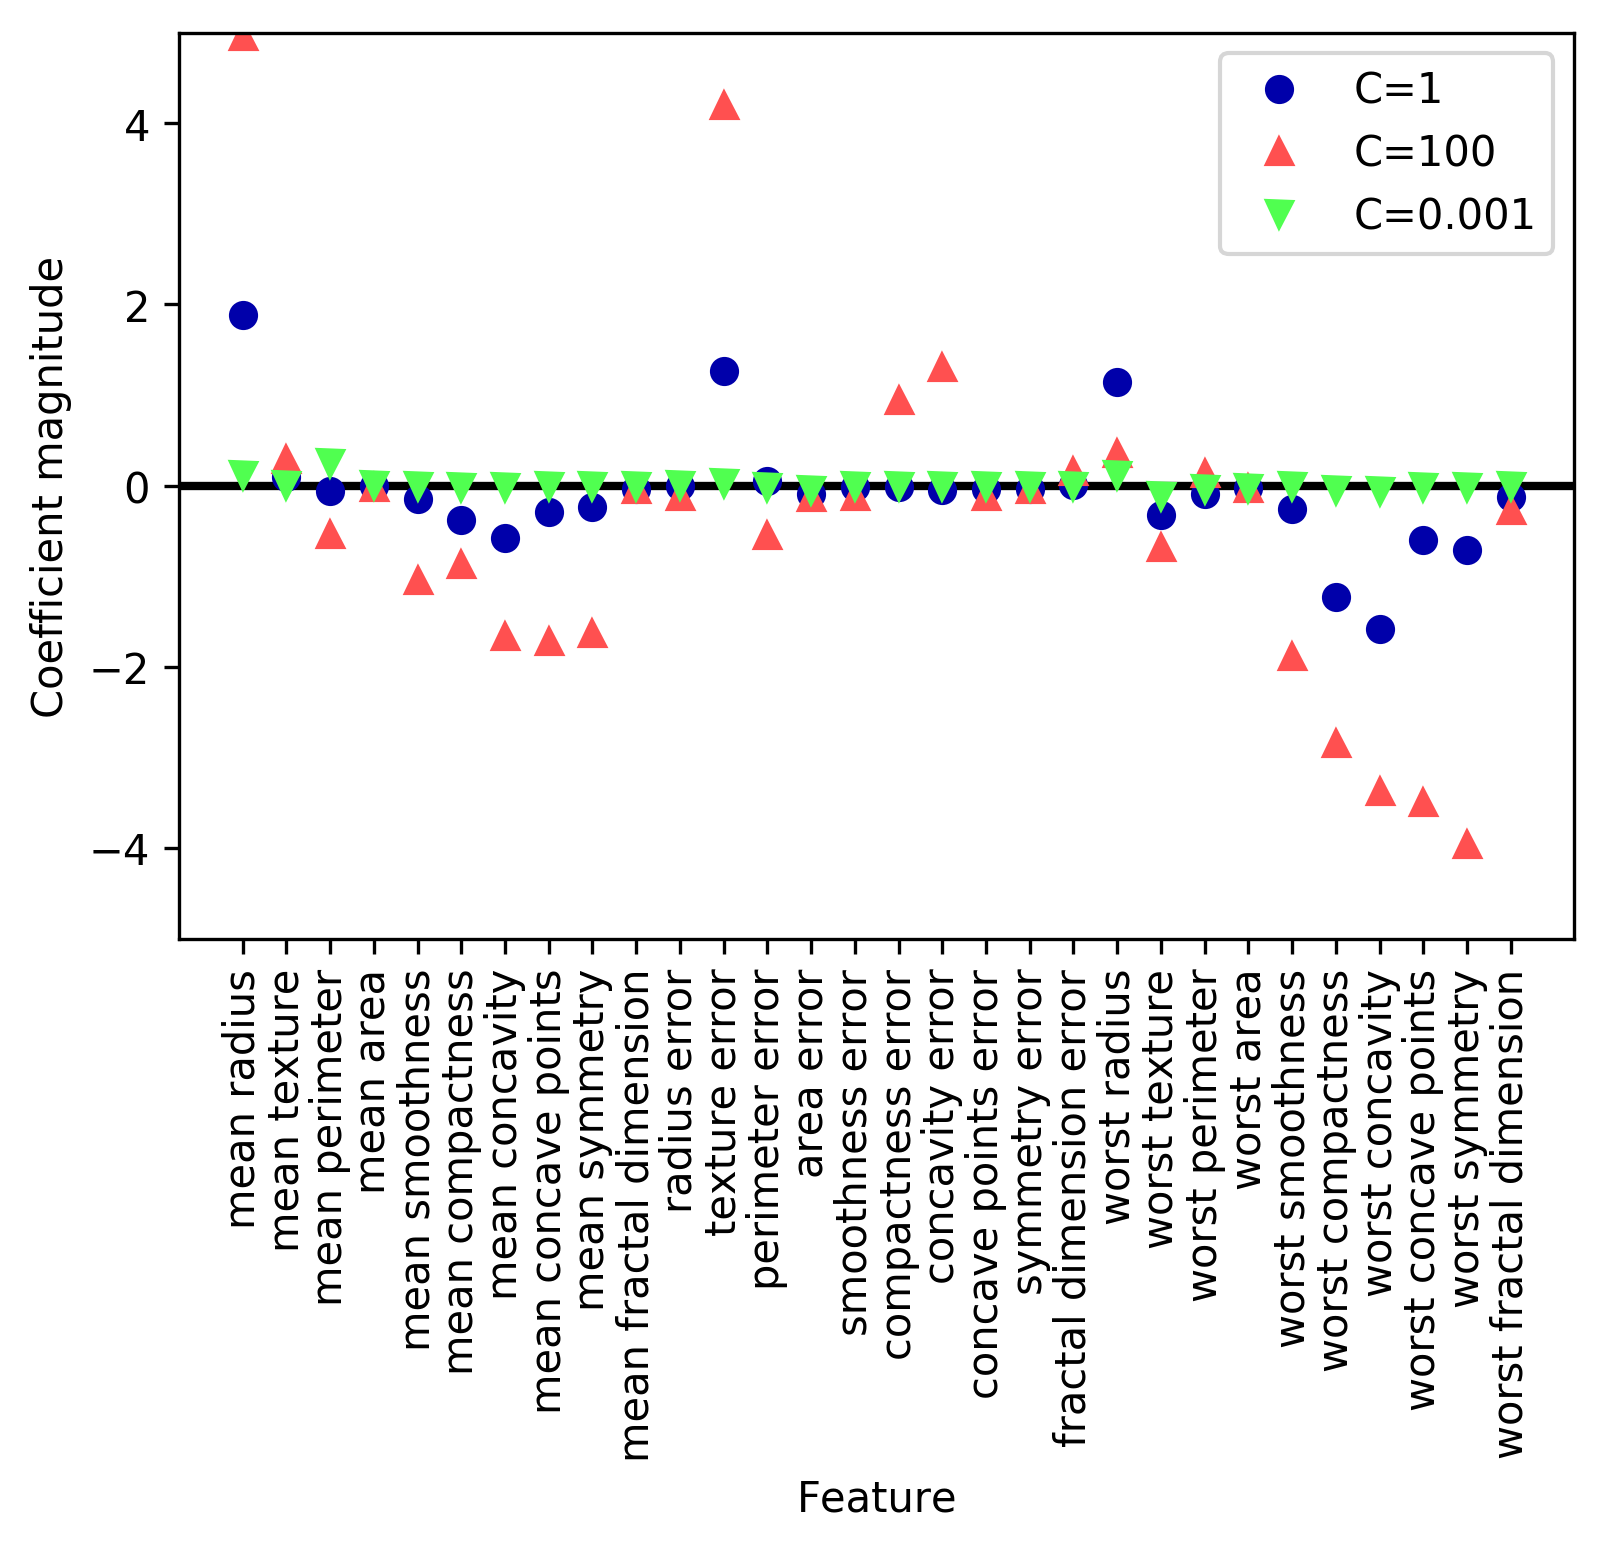

In [23]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

If we desire a more interpretable model, using L1 regularization might help, as it limits the model to using only a few features.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


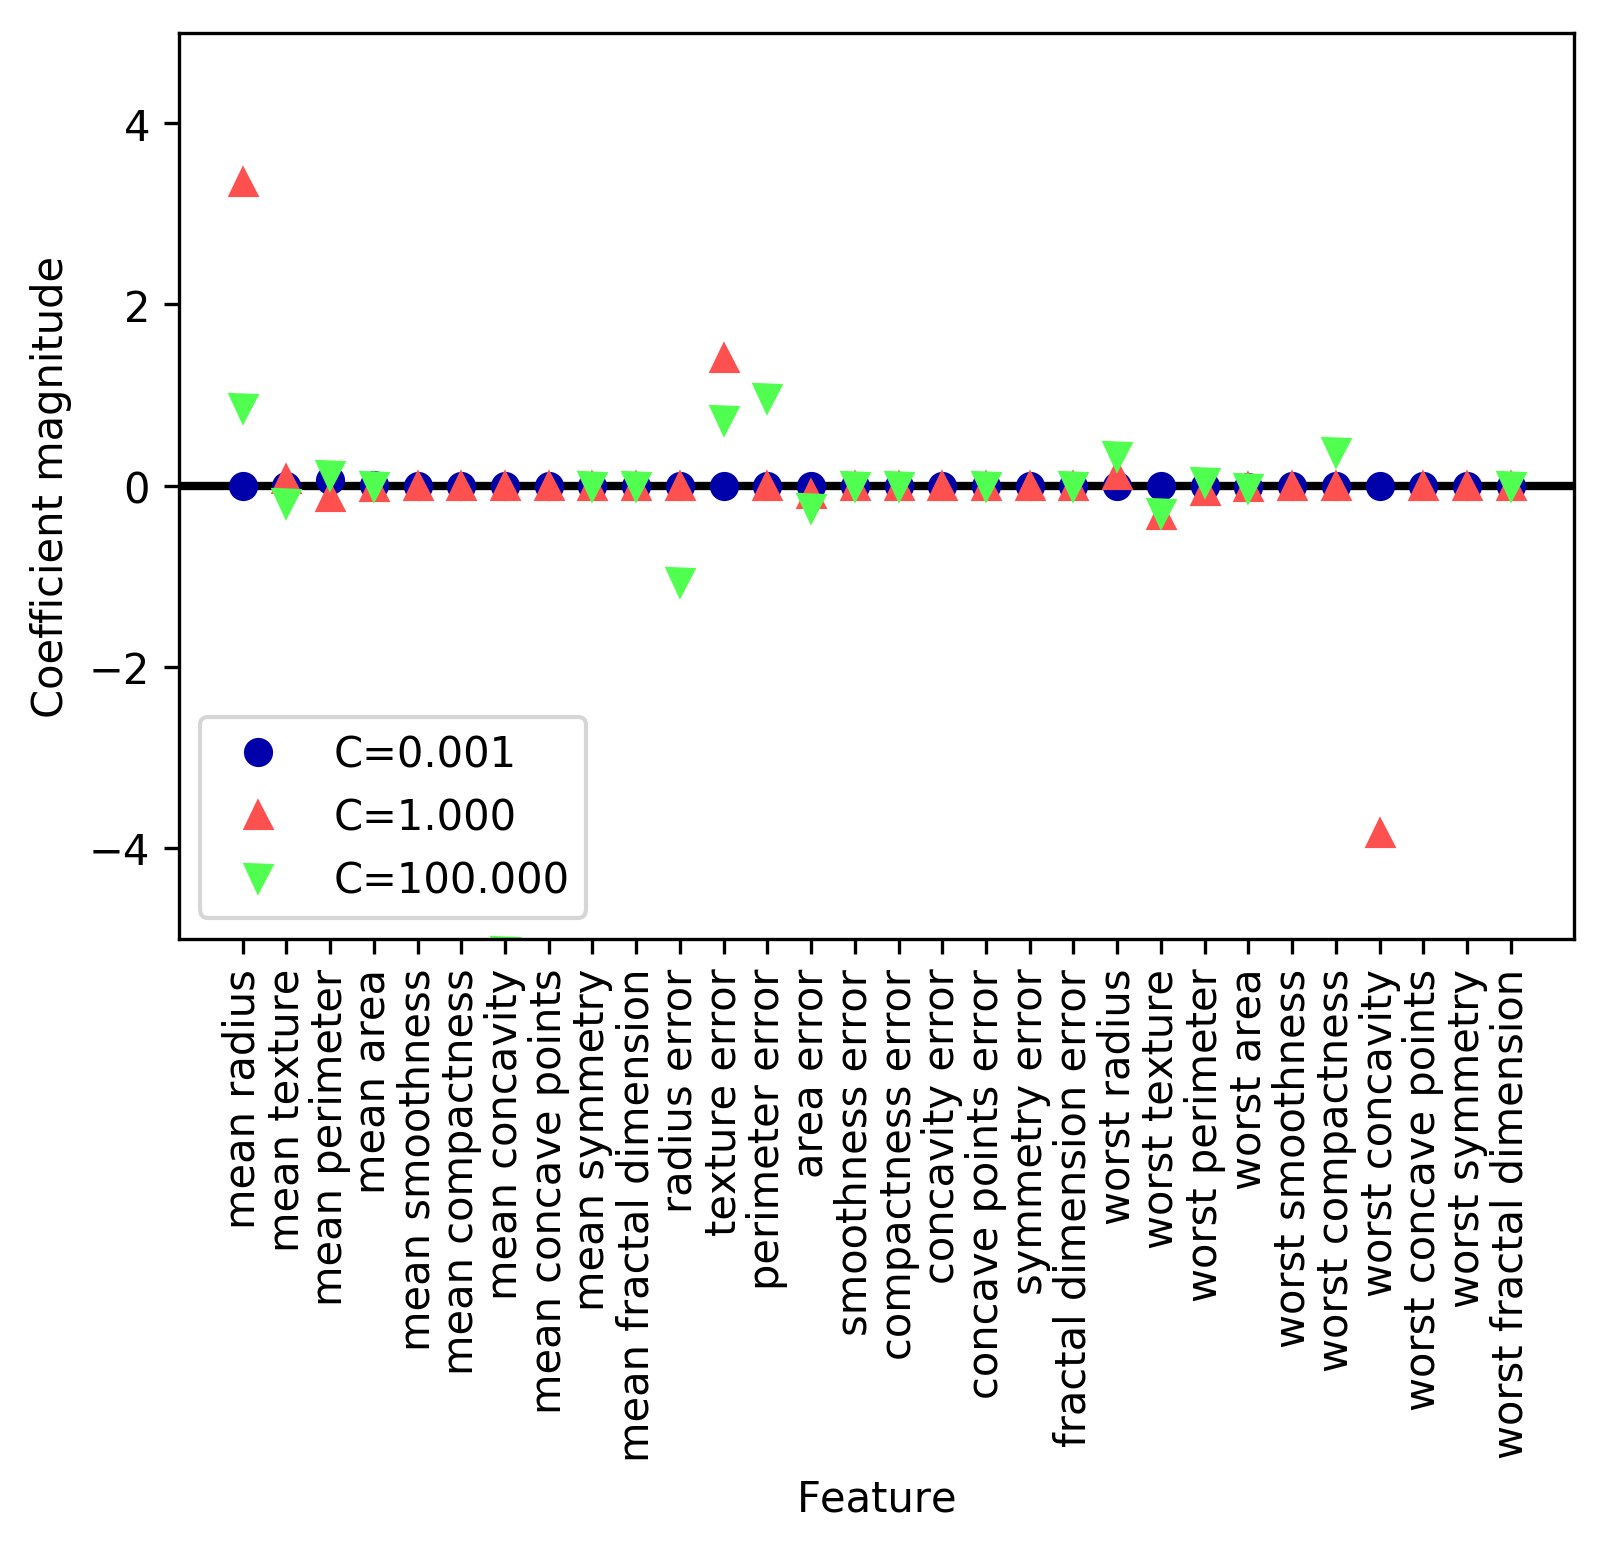

In [24]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

## Linear models for multiclass classification
Many linear classification models are for binary classification only, and don’t extend naturally to the multiclass case.

A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the **one-vs.-rest** approach.

In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. 

The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.
\begin{align*}
\end{align*}

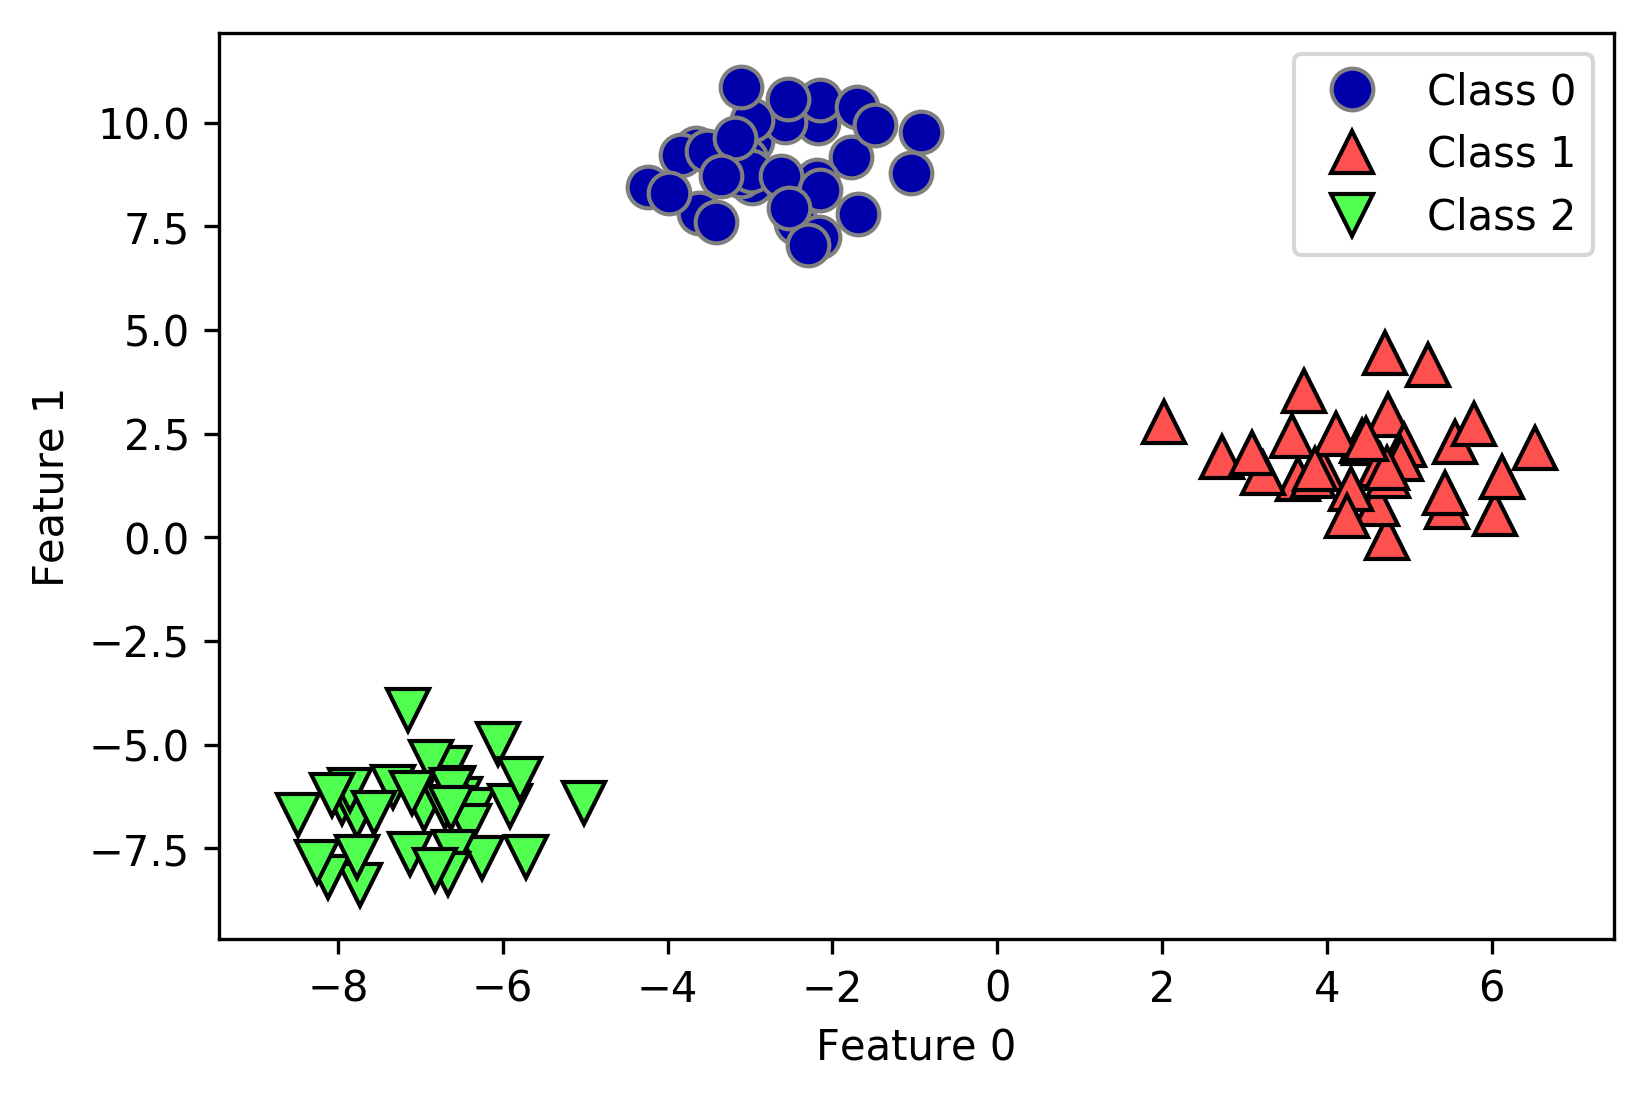

In [25]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [26]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

('Coefficient shape: ', (3L, 2L))
('Intercept shape: ', (3L,))


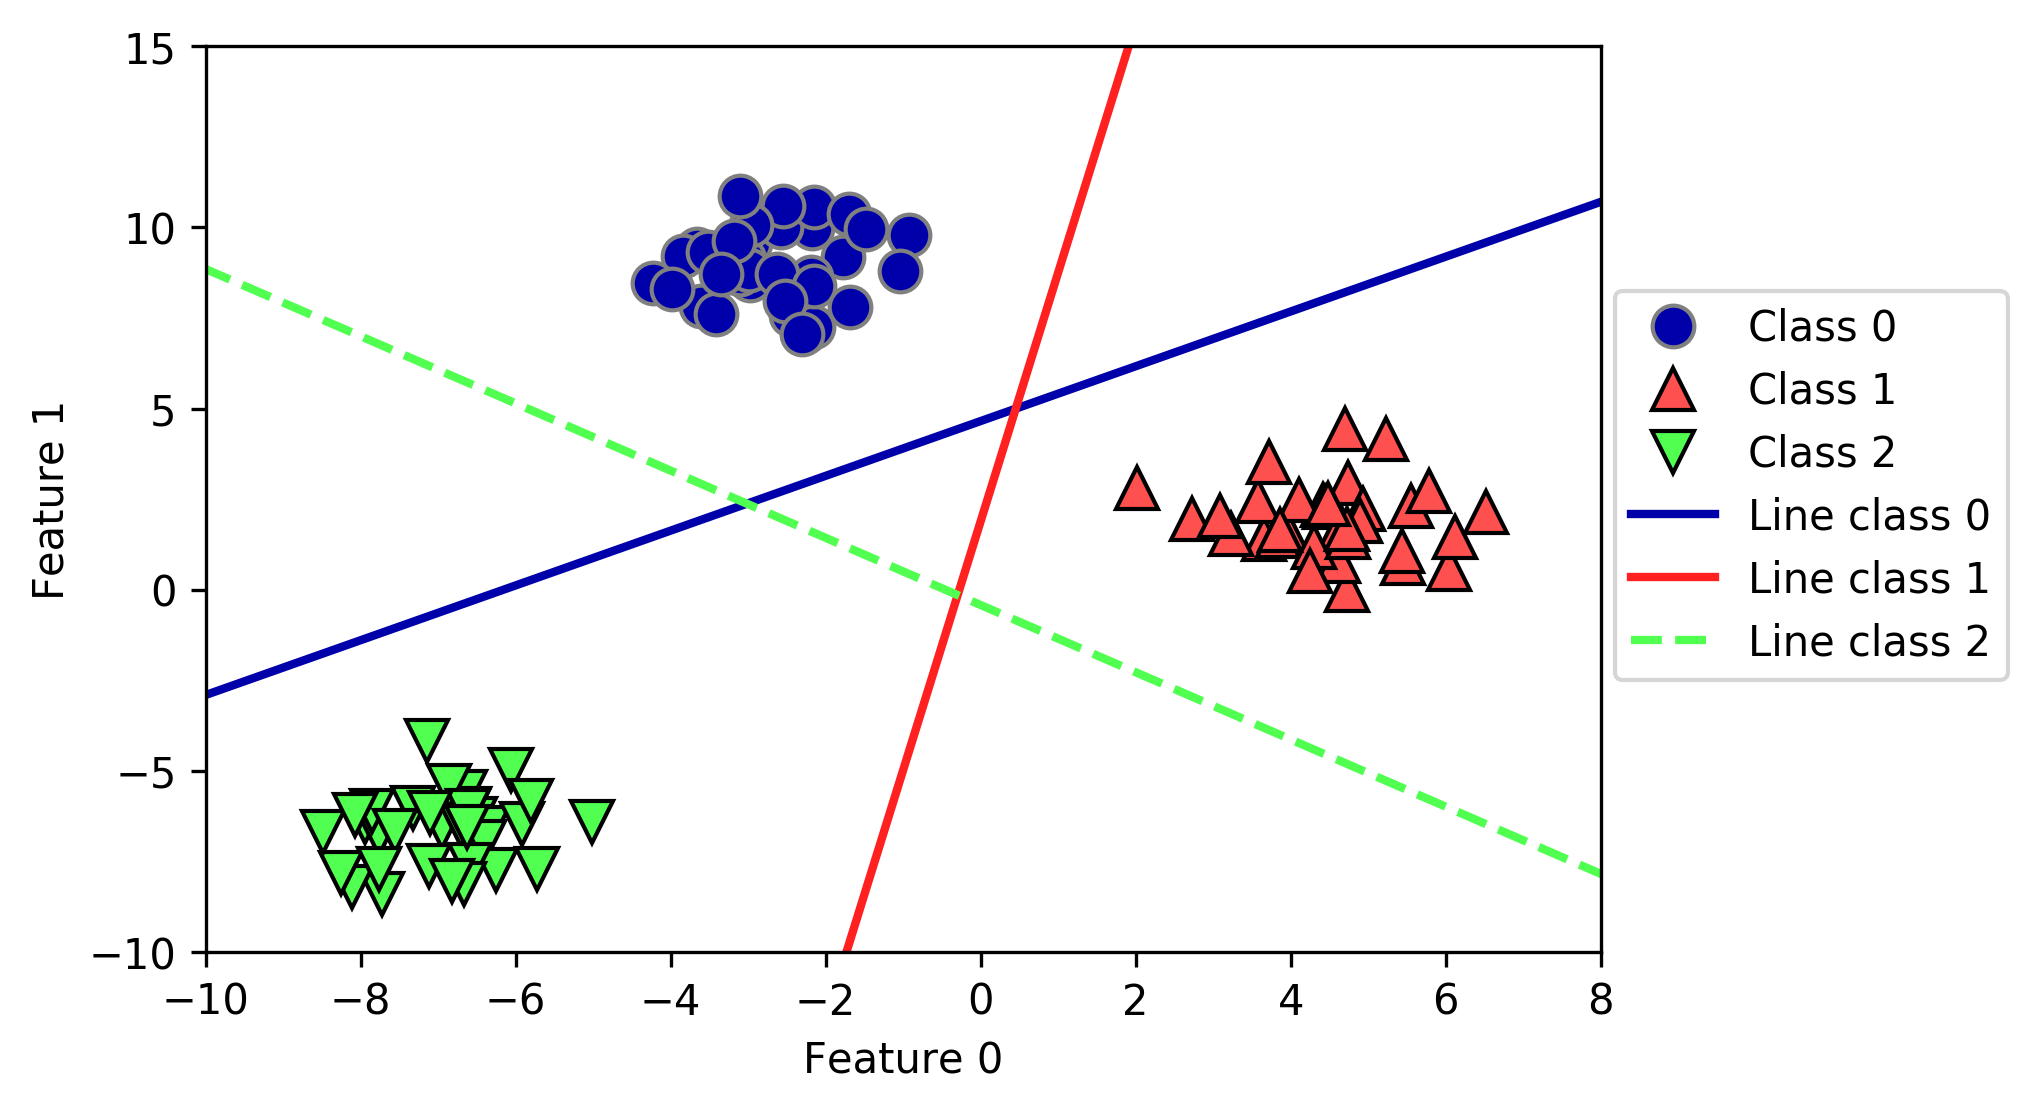

In [28]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

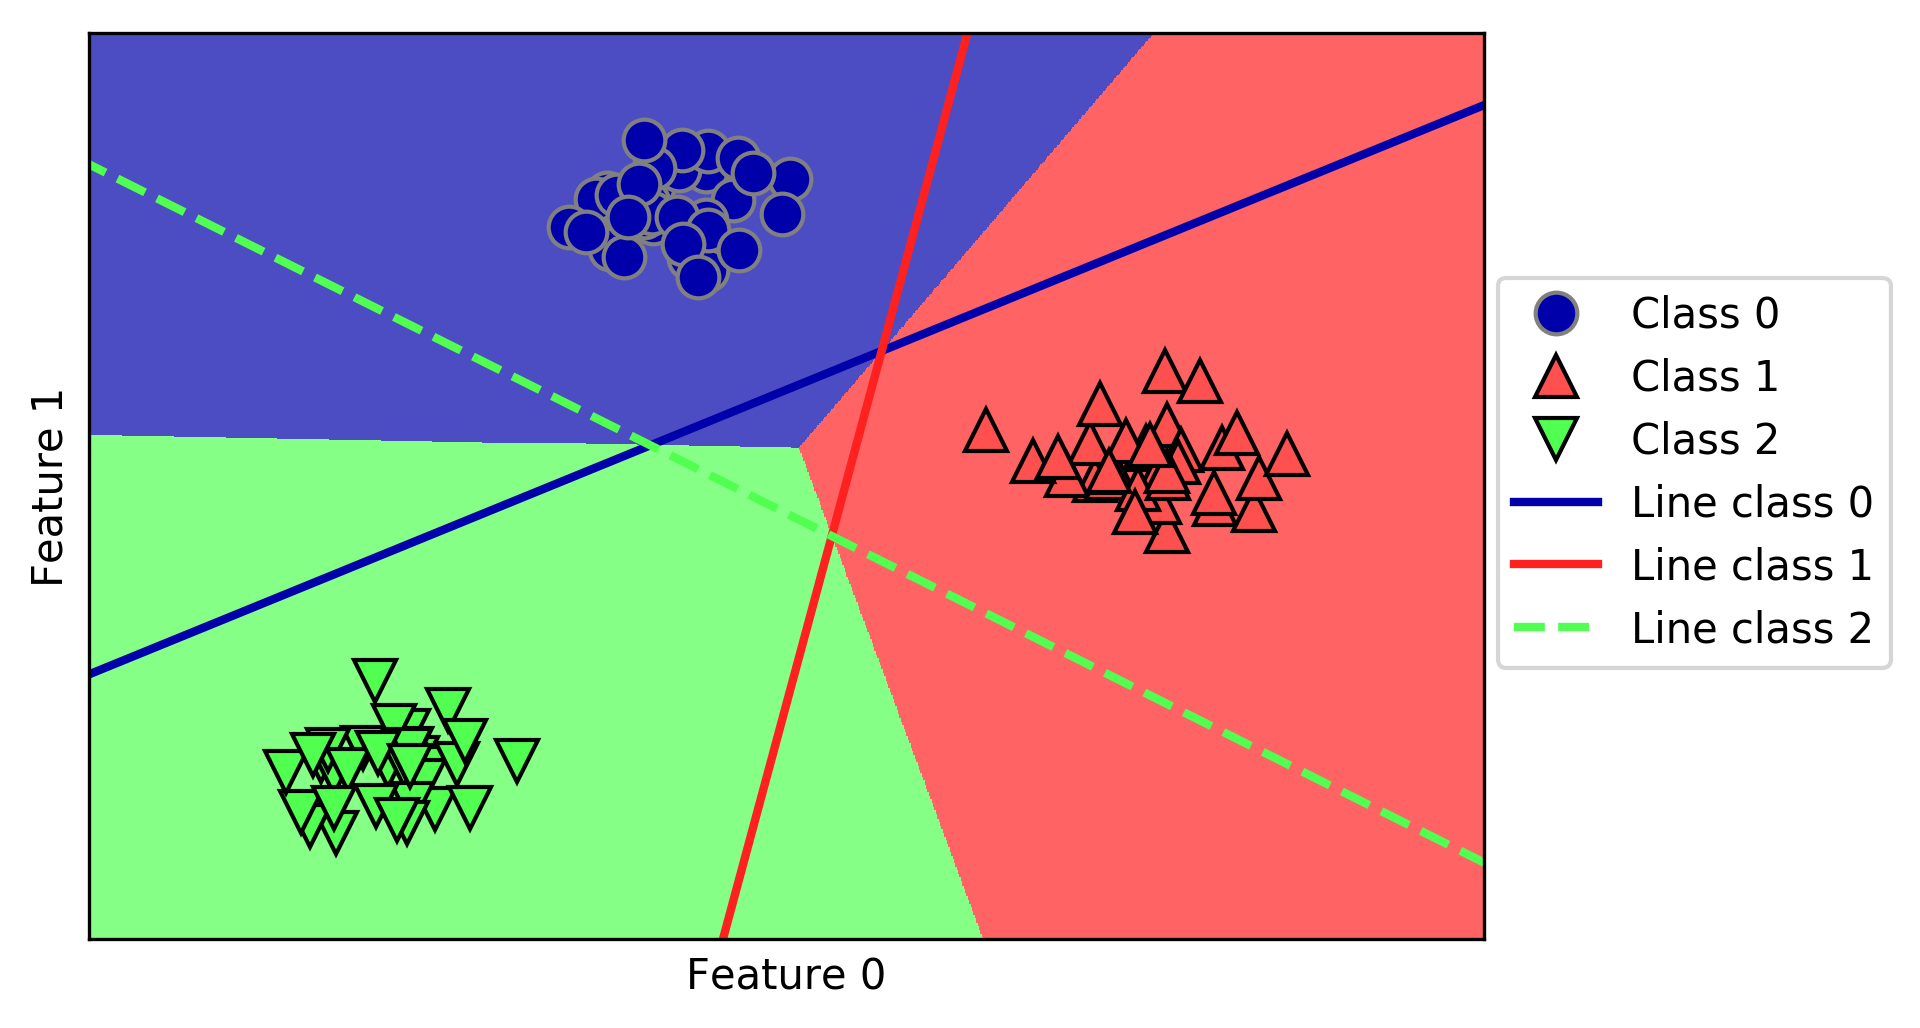

In [50]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")